<a href="https://colab.research.google.com/github/BerylXavier/BerylXavier/blob/main/tomato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
314/314 [==============================] - 5788s 18s/step - loss: 0.8900 - accuracy: 0.7103 - val_loss: 0.7098 - val_accuracy: 0.7600
Epoch 2/5
314/314 [==============================] - 5765s 18s/step - loss: 0.4731 - accuracy: 0.8380 - val_loss: 0.7074 - val_accuracy: 0.7880
Epoch 3/5
314/314 [==============================] - 5825s 19s/step - loss: 0.3723 - accuracy: 0.8733 - val_loss: 0.8317 - val_accuracy: 0.7760
Epoch 4/5
314/314 [==============================] - 5795s 18s/step - loss: 0.3286 - accuracy: 0.8878 - val_loss: 0.7037 - val_accuracy: 0.8120
Epoch 5/5
314/314 [==============================] - 5755s 18s/step - loss: 0.2632 - accuracy: 0.9109 - val_loss: 0.7696 - val_accuracy: 0.7870


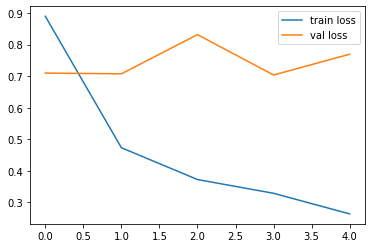

KeyError: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/detector/train'
valid_path = '/content/drive/MyDrive/detector/val'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

  
  # useful for getting number of classes
folders = glob('/content/drive/MyDrive/detector/train/*')
  

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

'''r=model.fit_generator(training_set,
                         samples_per_epoch = 8000,
                         nb_epoch = 5,
                         validation_data = test_set,
                         nb_val_samples = 2000)'''

# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('goodModel.h5')

In [ ]:
!python convert_model.py goodModel.h5 modelGood.json

2022-07-17 16:47:50.324304: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
loading goodModel.h5
Traceback (most recent call last):
  File "convert_model.py", line 846, in <module>
    main()
  File "convert_model.py", line 842, in main
    convert(in_path, out_path, no_tests)
  File "convert_model.py", line 813, in convert
    model = load_model(in_path)
  File "/usr/local/lib/python3.7/dist-packages/keras/utils/traceback_utils.py", line 67, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/usr/local/lib/python3.7/dist-packages/keras/saving/save.py", line 204, in load_model
    raise IOError(f'No file or directory found at {filepath_str}')
OSError: No file or directory found at goodModel.h5


NameError: ignored

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

import tensorflow as tf

from keras.models import load_model

model.save('goodModel.h5')

NameError: ignored

In [ ]:
model.save('goodModel.h5')

In [ ]:
!python convert_model.py goodModel.h5 modelGood.json

2022-07-17 16:52:00.524623: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
loading goodModel.h5
Forward pass took 0.79293 s.
Forward pass took 0.574723 s.
Forward pass took 0.549264 s.
Starting performance measurements.
Forward pass took 0.575839 s.
Forward pass took 0.562086 s.
Forward pass took 0.550338 s.
Forward pass took 0.564294 s.
Forward pass took 0.551185 s.
Forward pass took 0.5607483999999999 s on average.
Converting model architecture.
Converting model weights.
Done converting model weights.
Calculating model hash.
Model conversion finished.
writing modelGood.json
